In [1]:
# Importing basic packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('spam.tsv', sep='\t')
df.head(10)

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
6,ham,Even my brother is not like to speak with me. ...,77,2
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,6
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2


# Data Preprocessing

In [3]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [5]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [6]:
# Checking Imbalance Datset
df['label'].value_counts()/len(df)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [7]:
ham = df[df['label']=='ham']
spam = df[df['label']=='spam']

In [8]:
ham.shape,spam.shape

((4825, 4), (747, 4))

In [9]:
ham = ham.sample(spam.shape[0])

In [10]:
ham.shape,spam.shape

((747, 4), (747, 4))

In [11]:
# Balancing the dataset

data = ham.append(spam, ignore_index = True)
data.shape

(1494, 4)

In [12]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

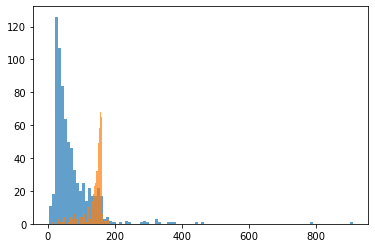

In [13]:
# Visualization using ham and spam

plt.hist(data[data['label']=='ham']['length'], bins=100, alpha=0.7)
plt.hist(data[data['label']=='spam']['length'], bins=100, alpha=0.7)
plt.show()

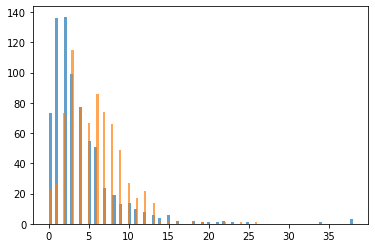

In [14]:
plt.hist(data[data['label']=='ham']['punct'], bins=100, alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'], bins=100, alpha=0.7)
plt.show()

In [15]:
# Splitting the data into training and test dataset for building model and prediction/evaluation
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test = train_test_split(data['message'],data['label'],test_size=0.3,random_state=101)

In [17]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1045,)
(449,)
(1045,)
(449,)


In [18]:
# Building Classification Model

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier

# Pipeline package to merge NLP and Machine Learning together and get output

from sklearn.pipeline import Pipeline

In [19]:
classifier = Pipeline([('tfidf',TfidfVectorizer()),('classifier',RandomForestClassifier())])

In [20]:
classifier.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [21]:
# Predicting the model by using test dataset

y_pred = classifier.predict(x_test)

In [22]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [23]:
print(confusion_matrix(y_test,y_pred))

[[223   3]
 [ 21 202]]


In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.91      0.99      0.95       226
        spam       0.99      0.91      0.94       223

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [25]:
print(accuracy_score(y_test,y_pred))

0.9465478841870824


In [26]:
# Support Vector Machine

from sklearn.svm import SVC

In [27]:
classifier1 = Pipeline([('tfidf',TfidfVectorizer()),('svm',SVC(C=100,gamma='auto'))])

In [28]:
classifier1.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('svm', SVC(C=100, gamma='auto'))])

In [29]:
y_pred1 = classifier1.predict(x_test)

In [30]:
print(confusion_matrix(y_test,y_pred1))

[[225   1]
 [ 29 194]]


In [31]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

         ham       0.89      1.00      0.94       226
        spam       0.99      0.87      0.93       223

    accuracy                           0.93       449
   macro avg       0.94      0.93      0.93       449
weighted avg       0.94      0.93      0.93       449



In [32]:
print(accuracy_score(y_test,y_pred1))

0.933184855233853


In [36]:
# Check your model performance
test1 = ['Hello, Hope you are doing well.']
test2 = ['Hi, you are learning Natural Language Processing']
test3 = ['Hope you are doing well and learning new things !']
test4 = ['Congratulations, You won a lottery ticket worth $10 Millons ! To claim call @11111']

In [37]:
# Random Forest
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))
print(classifier.predict(test4))

['ham']
['ham']
['ham']
['spam']


In [38]:
# SVM
print(classifier1.predict(test1))
print(classifier1.predict(test2))
print(classifier1.predict(test3))
print(classifier1.predict(test4))

['ham']
['ham']
['ham']
['spam']
